In [1]:
import matplotlib.pyplot as plt
from sympy import *
%matplotlib inline

import numpy as np
import pandas as pd
import tensorflow_addons as tfa

from keras.layers import Activation
from keras.models import Model
from keras import backend as K
import tensorflow as tf
import tensorflow.keras as keras
from keras.activations import swish, leaky_relu, relu, gelu, elu, softplus, softsign

C:\Users\sures\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Define the Esh activation function
def esh(x):
    return x * K.tanh(K.sigmoid(x))

def mish(x):
    return tfa.activations.mish(x)

In [3]:
df_depth = pd.read_csv("depthAcc.csv")
df_depth = df_depth.set_index('Function').T[:-1]
df_depth

Function,esh,gelu,leaky_relu,mish,relu,swish
15,0.9567,0.9562,0.9362,0.9577,0.7382,0.9510
16,0.9559,0.8978,0.8890,0.9560,0.6400,0.9435
17,0.9495,0.8357,0.8973,0.9034,0.4928,0.8945
18,0.9457,0.7235,0.6991,0.8257,0.4714,0.9358
19,0.7766,0.7219,0.8435,0.9345,0.2696,0.7820
20,0.7509,0.5572,0.7772,0.8869,0.4143,0.6801
21,0.7776,0.5500,0.5536,0.9174,0.4754,0.7490
22,0.7619,0.5624,0.6448,0.6876,0.3578,0.6125
23,0.7308,0.3117,0.6358,0.5238,0.3881,0.4076
24,0.6540,0.5309,0.6305,0.6167,0.4347,0.6713


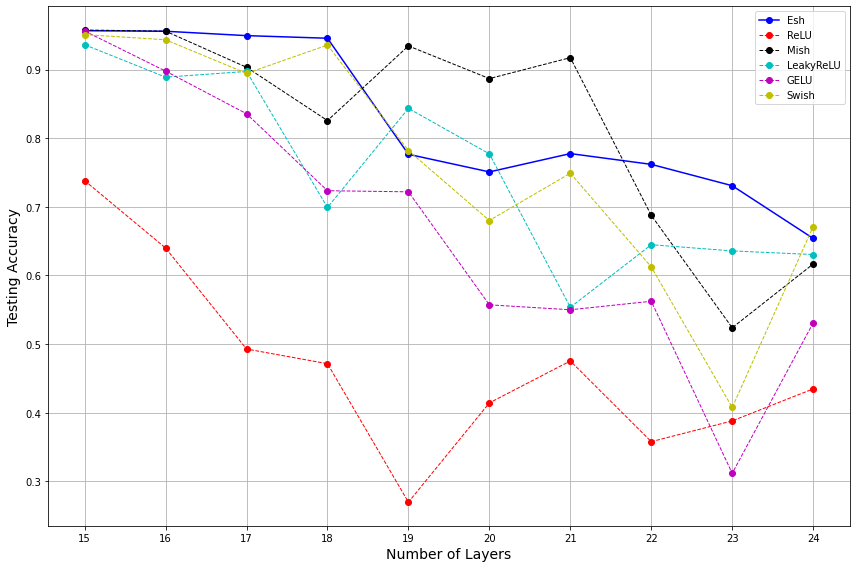

In [39]:
positions = list(range(10))
labels = list(range(15, 25))

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
plt.plot(df_depth['esh'], 'b-o', label= "Esh", linewidth=1.5)
plt.plot(df_depth['relu'],'r--o', label= "ReLU", linewidth=1)
plt.plot(df_depth['mish'], 'k--o', label= "Mish", linewidth=1)
plt.plot(df_depth['leaky_relu'], 'c--o', label= "LeakyReLU", linewidth=1)
plt.plot(df_depth['gelu'], 'm--o', label= "GELU", linewidth=1)
plt.plot(df_depth['swish'], 'y--o', label= "Swish", linewidth=1)


plt.legend(loc='best', fontsize=10)
plt.xticks(positions, labels)
plt.grid()
plt.xlabel('Number of Layers', fontsize = 14)
plt.ylabel('Testing Accuracy', fontsize = 14)
ax.tick_params(axis='both', which='major', labelsize=10)
#ax.title.set_text('Testing Accuracy vs Number of Layers on MNIST')
ax.title.set_fontsize(16)
plt.tight_layout()
#sns.despine(bottom=True,left=True)

plt.savefig("depth_acc.png", bbox_inches = 'tight')

plt.show()

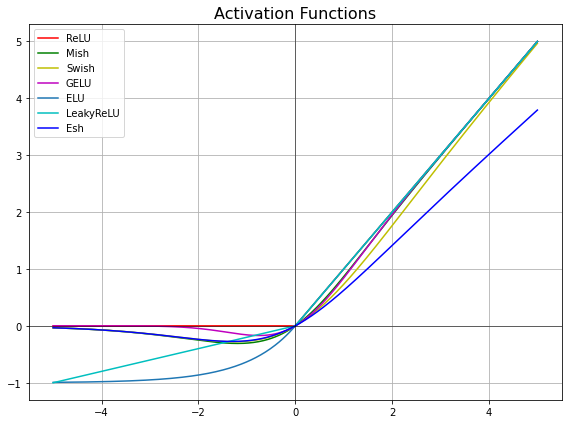

In [5]:
#positions = list(range(-5, 6))
#labels = list(range(15, 25))

xx = np.linspace(start=-5,stop=5,num=400)

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)

plt.plot(xx,relu(xx),'r-', label= "ReLU", linewidth=1.5)
plt.plot(xx,mish(xx), 'g-', label= "Mish", linewidth=1.5)
plt.plot(xx,swish(xx), 'y-', label= "Swish", linewidth=1.5)
plt.plot(xx,gelu(xx), 'm-', label= "GELU", linewidth=1.5)
plt.plot(xx,elu(xx), '-', label= "ELU", linewidth=1.5)
plt.plot(xx,leaky_relu(xx), 'c-', label= "LeakyReLU", linewidth=1.5)
plt.plot(xx,esh(xx), 'b-', label= "Esh", linewidth=1.5)
plt.axhline(color='black', linewidth=0.5)
plt.axvline(color='black', linewidth=0.5)


plt.legend(loc='best', fontsize=10)
#plt.xticks(positions, labels)
plt.grid()
#plt.xlabel('Number of Layers', fontsize = 14)
#plt.ylabel('Testing Accuracy', fontsize = 14)
ax.tick_params(axis='both', which='major', labelsize=10)
ax.title.set_text('Activation Functions')
ax.title.set_fontsize(16)
plt.tight_layout()
#sns.despine(bottom=True,left=True)

plt.savefig("afs.png", bbox_inches = 'tight', dpi=600)

plt.show()

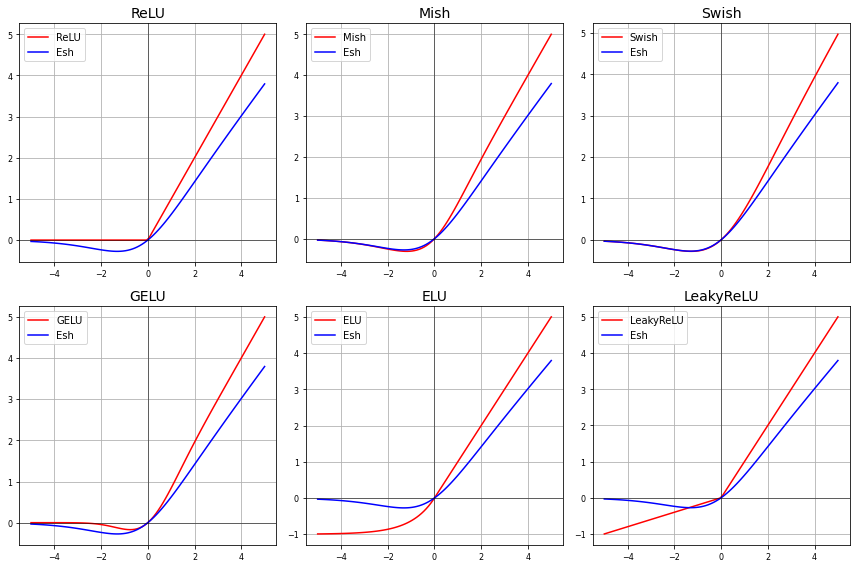

In [6]:
#### Grid
xx = np.linspace(start=-5,stop=5,num=100)
afs = [relu, mish, swish, gelu, elu, leaky_relu]
names = ['ReLU', 'Mish', 'Swish', 'GELU', 'ELU', 'LeakyReLU']
c = ['b-', 'r--', 'k--', 'c--', 'm--', 'y--']

#### Plot activation functions
fig = plt.figure(figsize=(12,8))

for i, af in enumerate(afs):
    plt.subplot(2,3,i+1)
    plt.plot(xx,af(xx), 'r-', linewidth=1.5, label= names[i])
    plt.plot(xx,esh(xx), 'b-', linewidth=1.5, label='Esh')
    plt.axhline(color='black', linewidth=0.5)
    plt.axvline(color='black', linewidth=0.5)
    plt.title(names[i], fontsize=14)
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=8)
    plt.grid()
    plt.legend(loc='best', fontsize=10)

plt.tight_layout()
plt.savefig("esh_afs_grid.png", bbox_inches = 'tight', dpi=600)    
plt.show()

In [7]:
x = symbols('x')
esh_exp = x*tanh(1/(1+exp(-x)))
esh_diff = diff(esh_exp, x)
esh_diff2 = diff(esh_exp, x, x)

f_esh = lambdify(x, esh_exp) 
f1_esh = lambdify(x, esh_diff) 
f2_esh = lambdify(x, esh_diff2)

esh_diff

x*(1 - tanh(1/(1 + exp(-x)))**2)*exp(-x)/(1 + exp(-x))**2 + tanh(1/(1 + exp(-x)))

In [8]:
x = symbols('x')
mish_exp = x*tanh(log(1 + exp(x)))
mish_diff = diff(mish_exp, x)
mish_diff2 = diff(mish_exp, x, x)

f_mish = lambdify(x, mish_exp) 
f1_mish = lambdify(x, mish_diff) 
f2_mish = lambdify(x, mish_diff2)

mish_diff

x*(1 - tanh(log(exp(x) + 1))**2)*exp(x)/(exp(x) + 1) + tanh(log(exp(x) + 1))

In [9]:
x = symbols('x')
swish_exp = x/(1+exp(-x))
swish_diff = diff(swish_exp, x)
swish_diff2 = diff(swish_exp, x, x)

f_swish = lambdify(x, swish_exp) 
f1_swish = lambdify(x, swish_diff) 
f2_swish = lambdify(x, swish_diff2)

swish_diff

x*exp(-x)/(1 + exp(-x))**2 + 1/(1 + exp(-x))

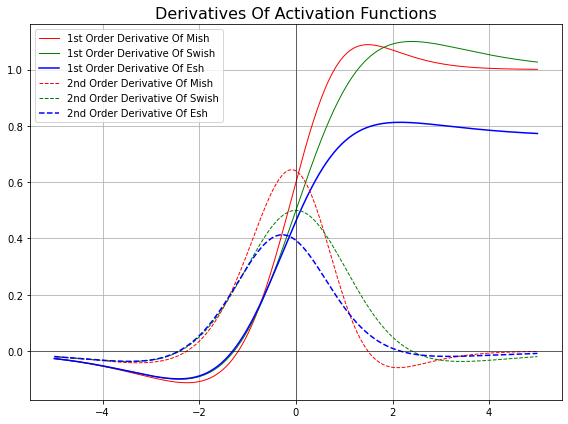

In [10]:
xx = np.linspace(start=-5,stop=5,num=400)

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)

plt.plot(xx,f1_mish(xx), 'r-', label= "1st Order Derivative Of Mish", linewidth=1)
plt.plot(xx,f1_swish(xx), 'g-', label= "1st Order Derivative Of Swish", linewidth=1)
plt.plot(xx,f1_esh(xx),'b-', label= "1st Order Derivative Of Esh", linewidth=1.5)

plt.plot(xx,f2_mish(xx), 'r--', label= "2nd Order Derivative Of Mish", linewidth=1)
plt.plot(xx,f2_swish(xx), 'g--', label= "2nd Order Derivative Of Swish", linewidth=1)
plt.plot(xx,f2_esh(xx),'b--', label= "2nd Order Derivative Of Esh", linewidth=1.5)

plt.axhline(color='black', linewidth=0.5)
plt.axvline(color='black', linewidth=0.5)


plt.legend(loc='best', fontsize=10)
#plt.xticks(positions, labels)
plt.grid()
#plt.xlabel('Number of Layers', fontsize = 14)
#plt.ylabel('Testing Accuracy', fontsize = 14)
ax.tick_params(axis='both', which='major', labelsize=10)
ax.title.set_text('Derivatives Of Activation Functions')
ax.title.set_fontsize(16)
plt.tight_layout()
#sns.despine(bottom=True,left=True)

plt.savefig("derivatives.png", bbox_inches = 'tight', dpi=600)

plt.show()

In [11]:
x = symbols('x')
sigmoid_exp = 1/(1+exp(-x))
f1 = x*tan(sigmoid_exp)
f2 = x*sin(sigmoid_exp)
f3 = x/(1-x*exp(-x))
esh_exp = x*tanh(sigmoid_exp)
f4 = tanh(x)

f3

x/(-x*exp(-x) + 1)

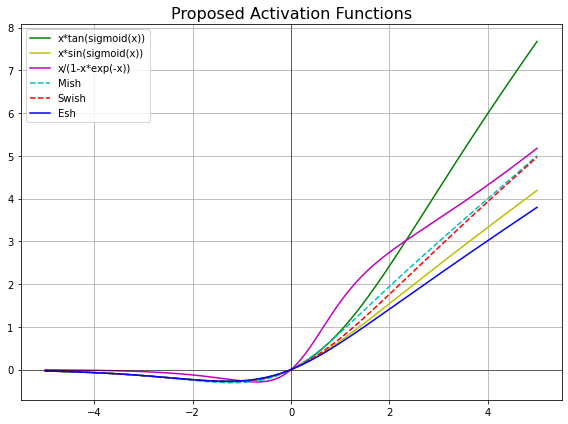

In [12]:
xx = np.linspace(start=-5,stop=5,num=400)

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)

#plt.plot(xx, lambdify(x, sigmoid_exp)(xx),'r--', label= "Sigmoid", linewidth=1.5)
plt.plot(xx, lambdify(x, f1)(xx), 'g-', label= "x*tan(sigmoid(x))", linewidth=1.5)
plt.plot(xx, lambdify(x, f2)(xx), 'y-', label= "x*sin(sigmoid(x))", linewidth=1.5)
plt.plot(xx, lambdify(x, f3)(xx), 'm-', label= "x/(1-x*exp(-x))", linewidth=1.5)
plt.plot(xx, mish(xx), 'c--', label= "Mish", linewidth=1.5)
plt.plot(xx, swish(xx), 'r--', label= "Swish", linewidth=1.5)
plt.plot(xx,esh(xx), 'b-', label= "Esh", linewidth=1.5)
plt.axhline(color='black', linewidth=0.5)
plt.axvline(color='black', linewidth=0.5)


plt.legend(loc='best', fontsize=10)
#plt.xticks(positions, labels)
plt.grid()
#plt.xlabel('Number of Layers', fontsize = 14)
#plt.ylabel('Testing Accuracy', fontsize = 14)
ax.tick_params(axis='both', which='major', labelsize=10)
ax.title.set_text('Proposed Activation Functions')
ax.title.set_fontsize(16)
plt.tight_layout()
#sns.despine(bottom=True,left=True)

plt.savefig("proposed_afs.png", bbox_inches = 'tight', dpi=600)

plt.show()

In [43]:
df_acc = pd.read_csv("Cifar100_Vgg16_acc_ep10.csv")
df_acc

,Esh,Mish,GELU,ReLU,LeakyReLU,Swish,ELU
0,0.32356,0.25706,0.25114,0.25696,0.23158,0.28858,0.24296
1,0.55726,0.42222,0.38196,0.40538,0.40888,0.47406,0.45712
2,0.64558,0.56708,0.53826,0.53068,0.50586,0.60448,0.58958
3,0.70154,0.64472,0.62834,0.61598,0.58738,0.66466,0.65156
4,0.73580,0.68876,0.67752,0.66096,0.63898,0.69990,0.69018
5,0.75402,0.71974,0.71116,0.70228,0.66856,0.72552,0.71934
6,0.76752,0.74010,0.72530,0.71938,0.69072,0.74466,0.73500
7,0.77236,0.75406,0.74118,0.74098,0.70478,0.75720,0.74956
8,0.78548,0.76016,0.75758,0.75152,0.72078,0.76720,0.75884
9,0.79276,0.77260,0.76634,0.76176,0.73202,0.77754,0.76812


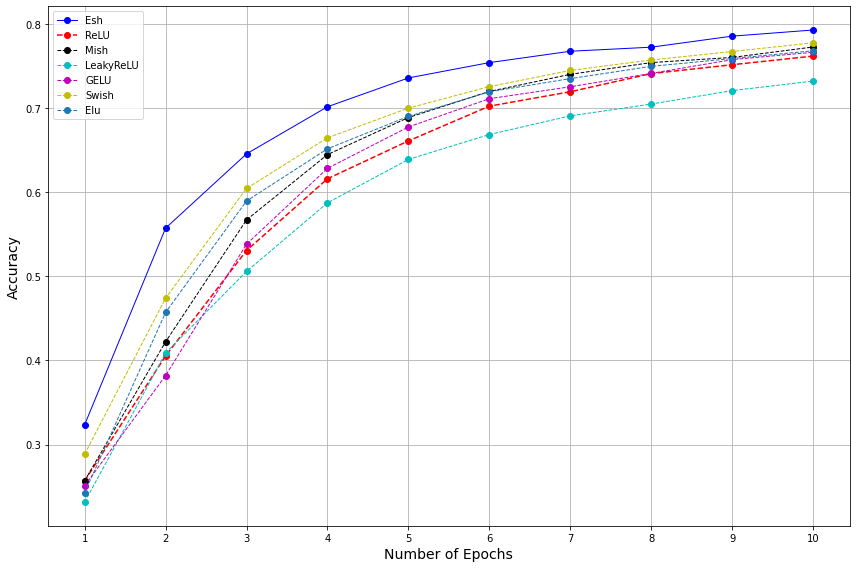

In [44]:
positions = list(range(10))
labels = list(range(1, 11))

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
plt.plot(df_acc['Esh'], 'b-o', label= "Esh", linewidth=1)
plt.plot(df_acc['ReLU'],'r--o', label= "ReLU", linewidth=1.5)
plt.plot(df_acc['Mish'], 'k--o', label= "Mish", linewidth=1)
plt.plot(df_acc['LeakyReLU'], 'c--o', label= "LeakyReLU", linewidth=1)
plt.plot(df_acc['GELU'], 'm--o', label= "GELU", linewidth=1)
plt.plot(df_acc['Swish'], 'y--o', label= "Swish", linewidth=1)
plt.plot(df_acc['ELU'], '--o', label= "Elu", linewidth=1)

plt.legend(loc='best', fontsize=10)
plt.xticks(positions, labels)
plt.grid()
plt.xlabel('Number of Epochs', fontsize = 14)
plt.ylabel('Accuracy', fontsize = 14)
ax.tick_params(axis='both', which='major', labelsize=10)
#ax.title.set_text('Testing Accuracy on CIFAR-10')
ax.title.set_fontsize(16)
plt.tight_layout()
#sns.despine(bottom=True,left=True)

plt.savefig("cifar10_acc.png", bbox_inches = 'tight')

plt.show()

In [45]:
df_loss = pd.read_csv("Cifar100_Vgg16_loss_ep10.csv")
df_loss

,Esh,Mish,GELU,ReLU,LeakyReLU,Swish,ELU
0,4.222163,7.201994,7.459181,7.998721,6.919230,6.917031,6.503691
1,2.849046,3.484688,3.686130,4.225595,3.216607,3.173237,2.730760
2,2.108508,2.292551,2.411044,2.776277,2.257561,2.111323,1.893458
3,1.702239,1.803047,1.882704,2.094521,1.813076,1.734130,1.622370
4,1.501159,1.607717,1.638913,1.770300,1.594839,1.571839,1.511910
5,1.406358,1.515148,1.522122,1.582789,1.513058,1.493903,1.459148
6,1.378132,1.477060,1.477749,1.508530,1.464547,1.461969,1.448502
7,1.391311,1.459307,1.474817,1.461814,1.443905,1.444502,1.424518
8,1.386968,1.459435,1.434460,1.445887,1.423936,1.424218,1.421037
9,1.398149,1.445574,1.432119,1.429240,1.416178,1.421033,1.401033


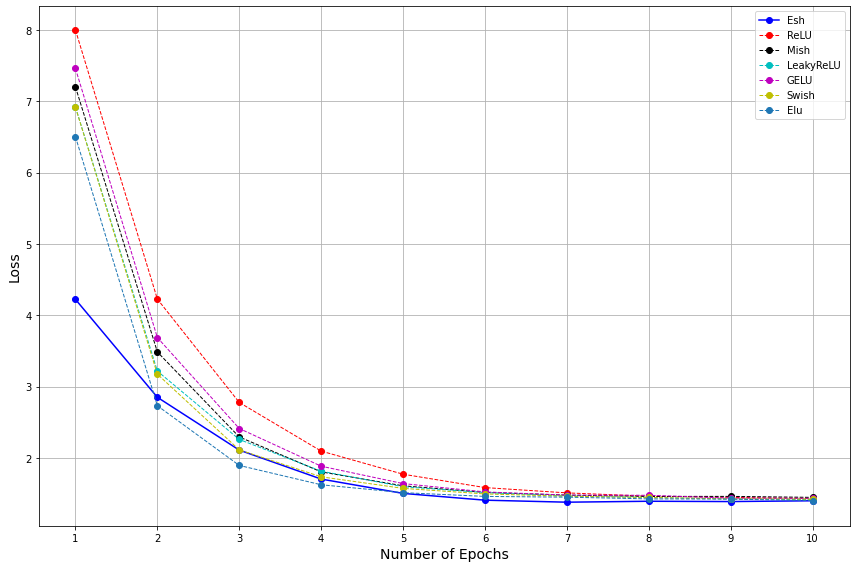

In [46]:
positions = list(range(10))
labels = list(range(1, 11))

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
plt.plot(df_loss['Esh'], 'b-o', label= "Esh", linewidth=1.5)
plt.plot(df_loss['ReLU'],'r--o', label= "ReLU", linewidth=1)
plt.plot(df_loss['Mish'], 'k--o', label= "Mish", linewidth=1)
plt.plot(df_loss['LeakyReLU'], 'c--o', label= "LeakyReLU", linewidth=1)
plt.plot(df_loss['GELU'], 'm--o', label= "GELU", linewidth=1)
plt.plot(df_loss['Swish'], 'y--o', label= "Swish", linewidth=1)
plt.plot(df_loss['ELU'], '--o', label= "Elu", linewidth=1)

plt.legend(loc='best', fontsize=10)
plt.xticks(positions, labels)
plt.grid()
plt.xlabel('Number of Epochs', fontsize = 14)
plt.ylabel('Loss', fontsize = 14)
ax.tick_params(axis='both', which='major', labelsize=10)
#ax.title.set_text('Testing Accuracy on CIFAR-10')
ax.title.set_fontsize(16)
plt.tight_layout()
#sns.despine(bottom=True,left=True)

plt.savefig("cifar10_loss.png", bbox_inches = 'tight')

plt.show()